In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [32]:
data = pd.read_csv('data.csv')

In [33]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [35]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [36]:
data.shape

(4600, 18)

In [37]:
data.drop_duplicates(inplace = True)

In [38]:
data = data.drop(data[data['price'] == 0].index)


In [39]:
data.shape

(4551, 18)

In [40]:
data['statezip'] = data['statezip'].apply(lambda x:x.split(' ')[-1])

In [41]:
data['statezip'] = data['statezip'].astype(int)

In [42]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,98052,USA


In [43]:
data = data.drop(['date','country'],axis=1)

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Encodedcity'] = le.fit_transform(data['city'])
data = data.drop(['city','street'],axis = 1)

In [45]:
objcols = data.select_dtypes(include='object')
objcols

""
0
1
2
3
4
...
4595
4596
4597
4598


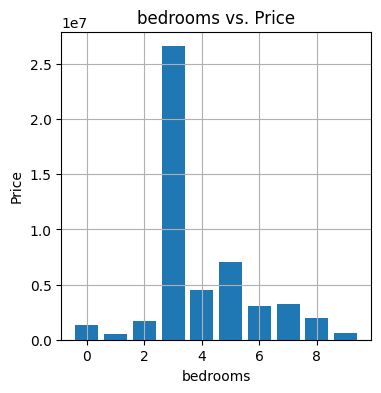

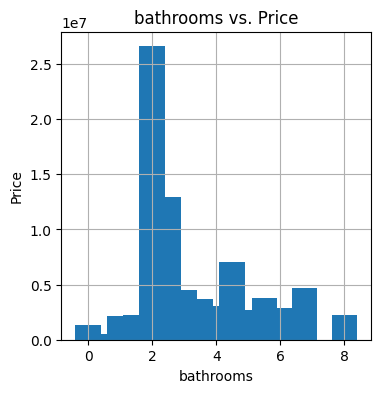

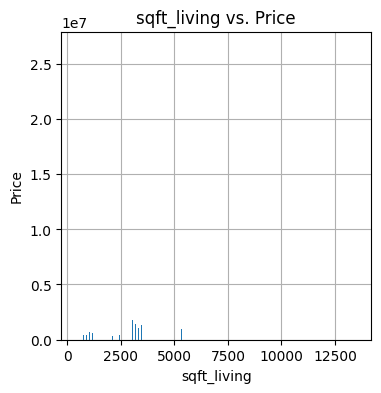

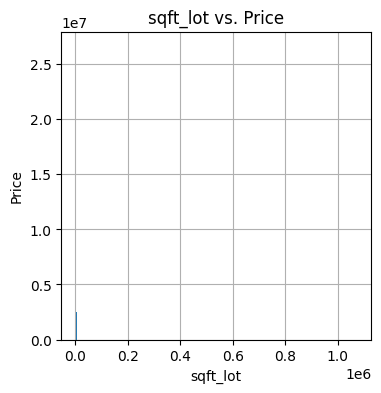

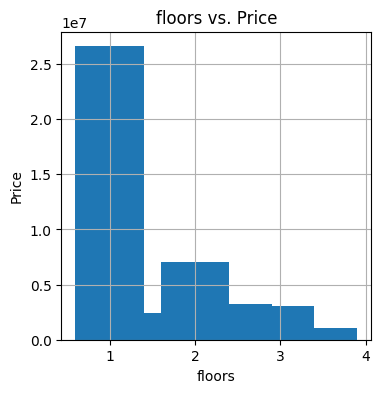

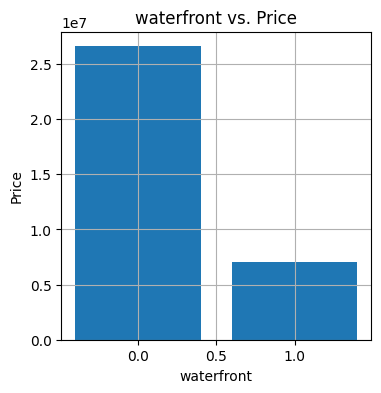

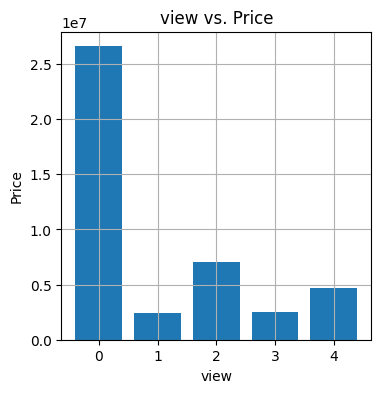

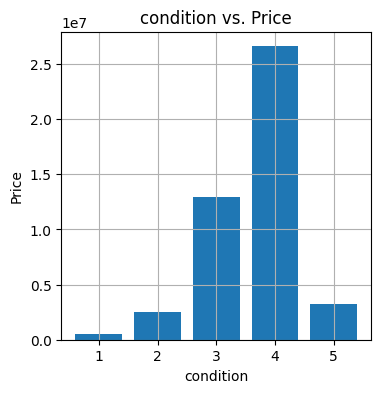

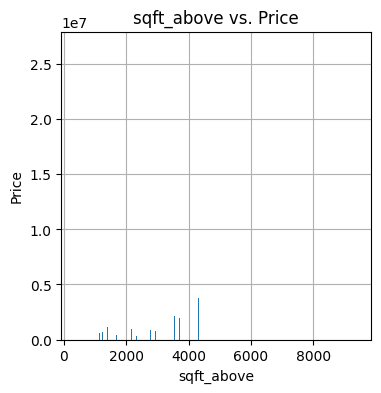

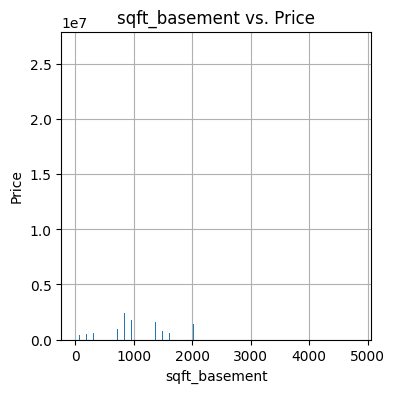

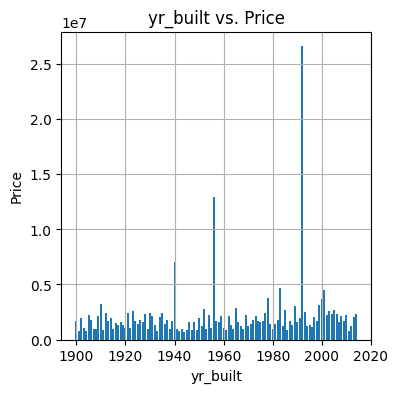

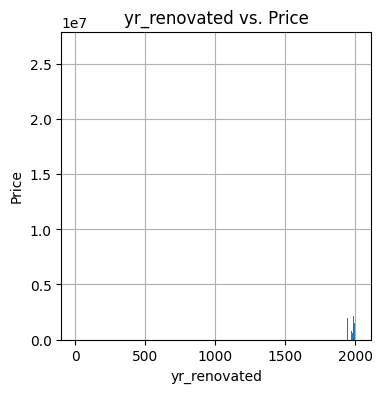

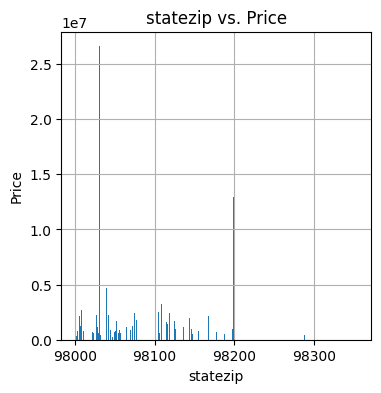

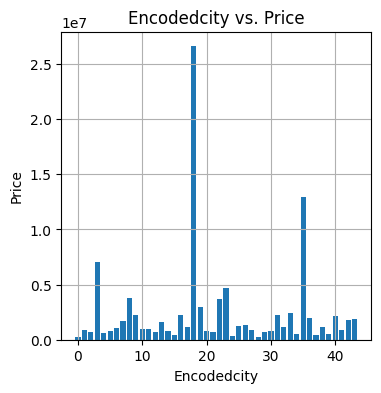

In [46]:
independent_variables = data.drop(['price'], axis=1).columns

for column in independent_variables:
    plt.figure(figsize=(4, 4))

    if data[column].dtype == 'object':
        sn.boxplot(x=column, y='price', data=data)
        plt.xticks(rotation=90)
        plt.title(f'{column} vs. Price')

    else:
        plt.bar(data[column], data['price'], data=data )
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.title(f'{column} vs. Price')
    
    plt.grid(True)
    plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop(columns=["price"])
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print('R-squared (R2):', r2*100)

R-squared (R2): 60.54197629949836


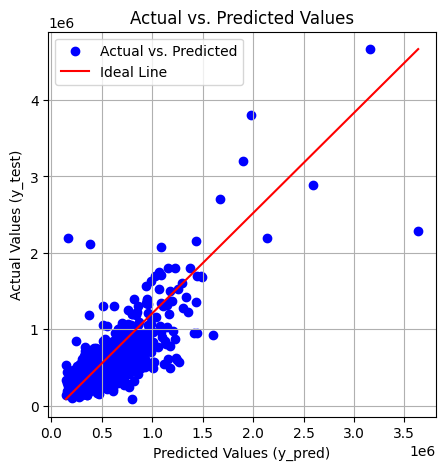

In [51]:
plt.figure(figsize=(5, 5))
plt.scatter(y_pred, y_test, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_pred), max(y_pred)], [min(y_test), max(y_test)], color='red', linestyle='-', label='Ideal Line')
plt.xlabel('Predicted Values (y_pred)')
plt.ylabel('Actual Values (y_test)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

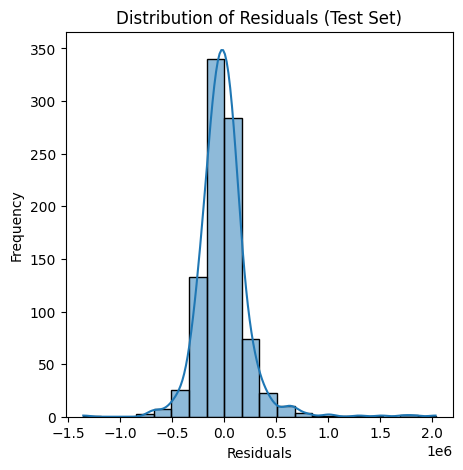

In [52]:
residuals = y_test - y_pred

plt.figure(figsize=(5, 5))
sn.histplot(residuals, bins=20, kde=True)
plt.title('Distribution of Residuals (Test Set)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()